In [5]:
%matplotlib notebook
from matplotlib import pyplot as plt
import matplotlib.colors as colors
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['text.usetex'] = True
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, MFDataset
import numpy as np
from PIL import Image, ImageDraw

In [6]:
it = 300  # time index
dosavefig = False

#dom1 = [(1516,0), (1460,0), (1123,552), (1207,610), (1627,647), (1670,215)] # atlantis-meteor complex
dom1 = [(1516,0), (1460,0), (1123,552), (1207,610), (1530,510), (1670,215)] # atlantis-meteor complex
dom2 = [(890,1079), (1259,928), (378, 343), (157,525)] # ridge, SW portion
dom3 = [(1490,1277), (1905,1117), (1983,1004), (1850,917), (1421,1004), (1310,1099)]
dom4 = [(1260,400), (1490,400), (1490,340), (1260,340)]
dom5 = [(890,1079), (1259,928), (1421,1004), (1310,1099)]

simul = 'luckyto-beg'
#path_base = '/ccc/scratch/cont003/gen7638/lahayen/{}/data/'.format(simul.upper())
#path_fig = '/ccc/work/cont003/gen7638/lahayen/{}/pictures/'.format(simul.upper())
path_base = '/data0/project/vortex/lahaye/DIAG/NRJ_fluxes/'
path_fig = '/home/lahaye/Documents/Results/NRJ_fluxes/{}/'.format(simul.upper())
#fil_iflux = path_base+simul+'_puv_fluxes_hf.?.nc'
fil_iflux = path_base+simul+'_bclnrj.?.nc'
fil_sflux = path_base+simul+'_bt_fluxes.?.nc'
#fil_grd = '/ccc/store/cont003/gen7638/lahayen/lucky_corgrd.nc'
fil_grd = '/net/ruchba/local/tmp/2/lahaye/prep_LUCKYTO/lucky_corgrd.nc'
scale = 'linear'    # linear or log color-scale
picdir = "pictures/"

st = 2  #ncr.subsamp_step

# plotting parameters
fs       = 12
proj     = 'lcc'
res      = 'i'
stride   = 5
Lx,Ly    = 1450e3,1450e3 # extend in km
cmap = plt.get_cmap('seismic')  #get_colormap('WhiteBlueGreenYellowRed.ncmap')
zlevs=[0,2000,3500]
topocol='k'     # isobath. contour color
grdcol='gray'   # grid color

valmax = 0.5
valmin = -0.2
cmap = 'seismic'

In [7]:
# Load data
ncbt = MFDataset(fil_sflux,aggdim='eta_rho')
ncgr = Dataset(fil_grd,'r')
ncgvar = ncgr.variables
slix = slice(1,2000,st)
sliy = slice(1,2000,st)
lon = ncgvar['lon_rho'][sliy,slix]
lat = ncgvar['lat_rho'][sliy,slix]
topo = ncgvar['h'][sliy,slix]
indx, indy = ncbt.variables['xi_rho'][:],ncbt.variables['eta_rho'][:]
ncbt.close()
slix = slice(indx[0],indx[-1]+1,indx[1]-indx[0])
sliy = slice(indy[0],indy[-1]+1,indy[1]-indy[0])
pm = ncgvar['pm'][:][sliy,slix]/st
pn = ncgvar['pn'][:][sliy,slix]/st
ncgr.close()

In [8]:
# load data : conversion term, baroclinic and barotropic fluxes

ncbt = MFDataset(fil_sflux,aggdim='eta_rho')
cterm = ncbt.variables['Ct_lf'][:,:,it]  
ncbt.close()

ncbc = MFDataset(fil_iflux,aggdim='eta_rho')
Fx = np.ma.masked_invalid(ncbc.variables['puint_lf'][:,:,it])
Fy = np.ma.masked_invalid(ncbc.variables['pvint_lf'][:,:,it])
ncbc.close()

divflux = (np.gradient(Fx,np.mean(1./pm),axis=1) + np.gradient(Fy,np.mean(1./pn),axis=0)) *1e3

nc = MFDataset(fil_sflux, aggdim="eta_rho")
Fx = np.ma.masked_invalid(nc.variables['pubt_lf'][:,:,it])
Fy = np.ma.masked_invalid(nc.variables['pvbt_lf'][:,:,it])
nc.close()

divfbt = (np.gradient(Fx,np.mean(1./pm),axis=1) + np.gradient(Fy,np.mean(1./pn),axis=0)) *1e3

/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app
/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


In [9]:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

norm = MidpointNormalize(midpoint=0)

In [10]:
def poly_subsamp(inds, xi, eta):
    # go from coordinates in full grid to coordinate in subsampled grid
        return [(abs(xi-ii).argmin(),abs(eta-jj).argmin()) for ii,jj in inds]


<IPython.core.display.Javascript object>


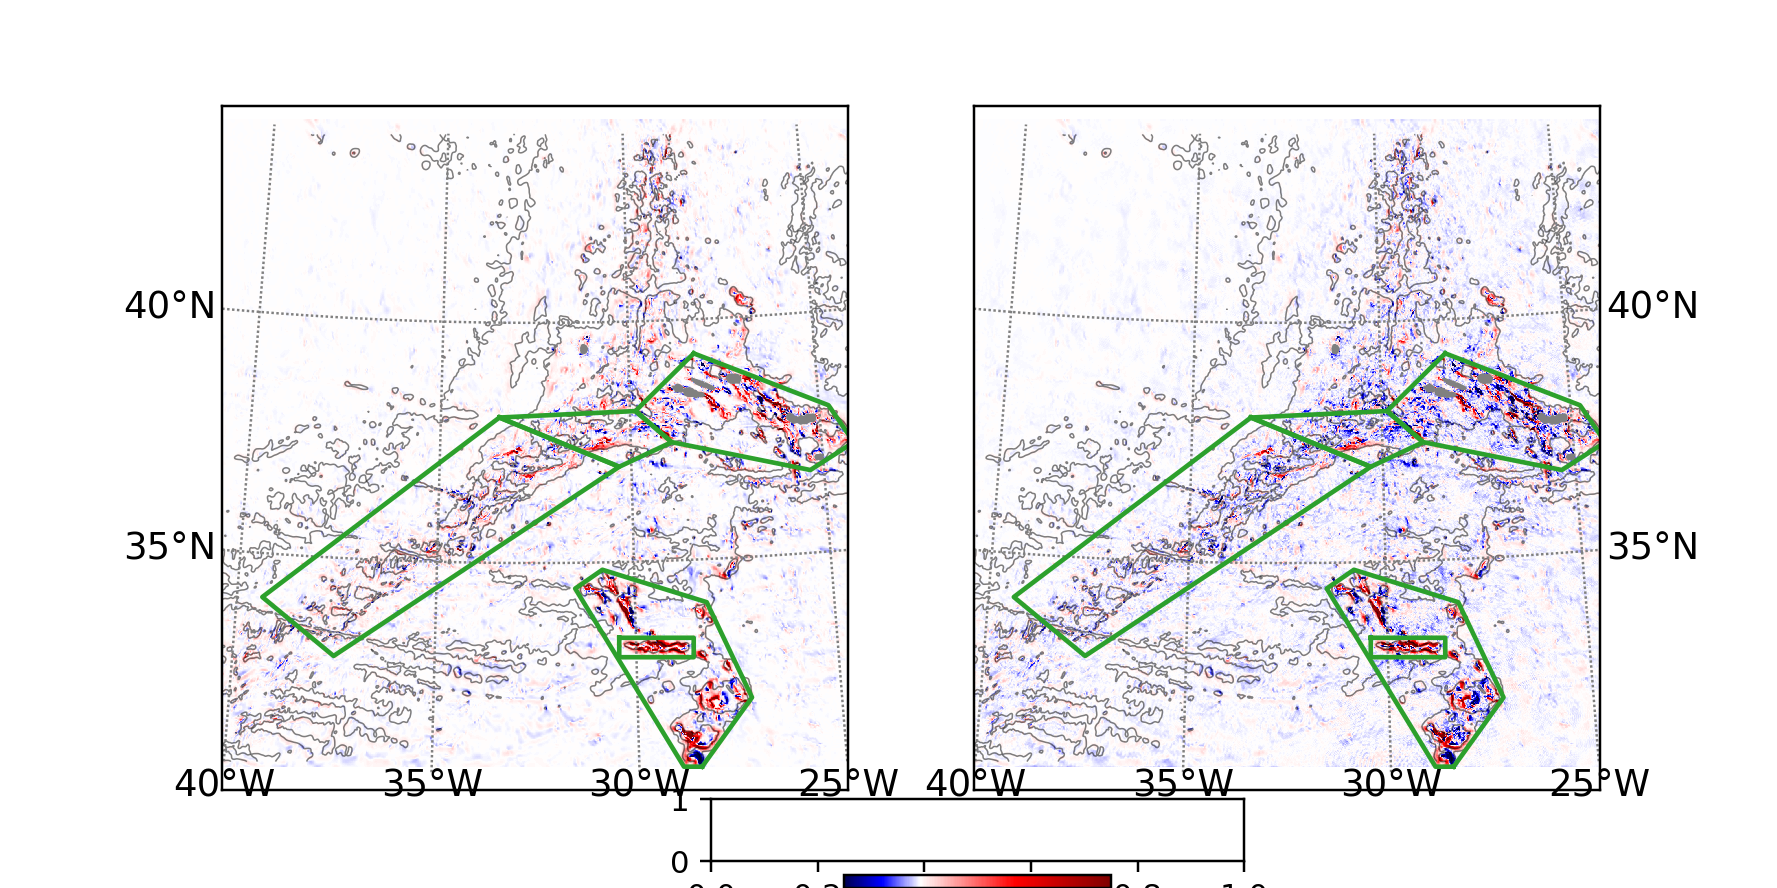

domain 0: total conversion: 3.11 GW -- 32.50 mW/m^2
domain 0: integrated flux divergence: 1.87 GW -- 19.53 mW/m^2
barotropic flux: -1.76GW -- -18.36 mW/m^2
estimated dissipation: 1.24 GW -- 12.98 mW/m^2
domain 1: total conversion: 1.42 GW -- 8.32 mW/m^2
domain 1: integrated flux divergence: 0.06 GW -- 0.37 mW/m^2
barotropic flux: 0.37GW -- 2.17 mW/m^2
estimated dissipation: 1.36 GW -- 7.95 mW/m^2
domain 2: total conversion: 1.87 GW -- 24.73 mW/m^2
domain 2: integrated flux divergence: 0.38 GW -- 5.13 mW/m^2
barotropic flux: -1.36GW -- -18.19 mW/m^2
estimated dissipation: 1.48 GW -- 19.79 mW/m^2
domain 3: total conversion: 0.95 GW -- 117.83 mW/m^2
domain 3: integrated flux divergence: 0.73 GW -- 90.91 mW/m^2
barotropic flux: -0.85GW -- -105.92 mW/m^2
estimated dissipation: 0.22 GW -- 26.92 mW/m^2
domain 4: total conversion: 0.45 GW -- 16.37 mW/m^2
domain 4: integrated flux divergence: 0.02 GW -- 0.89 mW/m^2
barotropic flux: -0.18GW -- -6.44 mW/m^2
estimated dissipation: 0.42 GW -- 15.48

In [11]:
# plot data
doms = [dom1, dom2, dom3, dom4, dom5]

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8,4))

##### bottom-conversion term
ax, data = axs[0], cterm
bm = Basemap(projection=proj,resolution=res,lon_0=lon.mean(),
    lat_0=lat.mean(),width=Lx,height=Ly, ax=ax)
xx, yy = bm(lon, lat)
bm.drawcoastlines(color='gray')
bm.fillcontinents(color='gray')
bm.drawparallels(np.arange(-60,70,stride),labels=[1,0,0,0],linewidth=0.8,\
                fontsize=fs,color=grdcol)
bm.drawmeridians(np.arange(-100,100,stride),labels=[0,0,0,1],linewidth=0.8,\
                fontsize=fs,color=grdcol)
hct = bm.contour(xx,yy,topo,levels=zlevs,colors=topocol,linewidths=0.5,alpha=0.5)
for item in hct.collections:
    item.set_rasterized(True)

hpc = bm.pcolormesh(xx,yy,cterm,vmin=valmin,vmax=valmax,norm=norm,cmap=cmap)
for dom in doms:
    pola = np.r_[[np.array([lon[jj,ii],lat[jj,ii]]) for ii,jj in poly_subsamp(dom,indx,indy)]]
    x, y = bm(*pola.T.take(range(len(dom)+1),axis=1,mode='wrap'))
    bm.plot(x, y, color="tab:green")
    
##### bottom-conversion term
ax, data = axs[1], divflux
bm = Basemap(projection=proj,resolution=res,lon_0=lon.mean(),
    lat_0=lat.mean(),width=Lx,height=Ly, ax=ax)
xx, yy = bm(lon, lat)
bm.drawcoastlines(color='gray')
bm.fillcontinents(color='gray')
bm.drawparallels(np.arange(-60,70,stride),labels=[0,1,0,0],linewidth=0.8,\
                fontsize=fs,color=grdcol)
bm.drawmeridians(np.arange(-100,100,stride),labels=[0,0,0,1],linewidth=0.8,\
                fontsize=fs,color=grdcol)
hct = bm.contour(xx,yy,topo,levels=zlevs,colors=topocol,linewidths=0.5,alpha=0.5)
for item in hct.collections:
    item.set_rasterized(True)

hpc = bm.pcolormesh(xx,yy,divflux,vmin=valmin,vmax=valmax,norm=norm,cmap=cmap)
for ido in range(len(doms)):
    dom = doms[ido]
    pola = np.r_[[np.array([lon[jj,ii],lat[jj,ii]]) for ii,jj in poly_subsamp(dom,indx,indy)]]
    x, y = bm(*pola.T.take(range(len(dom)+1),axis=1,mode='wrap'))
    bm.plot(x, y, color="tab:green")
    img = Image.new('1',topo.shape)
    ImageDraw.Draw(img).polygon(poly_subsamp(dom,indx,indy), outline=1, fill=1)
    mask = np.array(img)
    print("domain {0}: total conversion: {1:.2f} GW -- {2:.2f} mW/m^2".format(ido, np.nansum((cterm/pm/pn/1e9)[mask]) \
                                                         , np.nanmean(cterm[mask])*1e3) )
    print("domain {0}: integrated flux divergence: {1:.2f} GW -- {2:.2f} mW/m^2".format(ido \
                , np.nansum((divflux/pm/pn/1e9)[mask]), np.nanmean(divflux[mask])*1e3) )
    print("barotropic flux: {0:.2f}GW -- {1:.2f} mW/m^2".format(\
                np.nansum((divfbt/pm/pn/1e9)[mask]), np.nanmean(divfbt[mask])*1e3) )
    print("estimated dissipation: {0:.2f} GW -- {1:.2f} mW/m^2".format(np.nansum(((cterm-divflux)/pm/pn/1e9)[mask]) \
         , np.nanmean((cterm-divflux)[mask])*1e3) ) 
cb_ax = fig.add_axes([0.4,0.0,0.3,0.1])    
hcb = fig.colorbar(hpc, ax=cb_ax, orientation="horizontal")#,extend='both')
#hcb.formatter.set_powerlimits((-1, 1))    
#hcb.update_ticks()
#hcb.ax.tick_params(labelsize=fs)
#hcb.set_label(r'$W/m^2$',fontsize=fs+1)

#if dosavefig:
#    plt.savefig(picdir+"luckym2_Ct_slides.png",magnification='auto',dpi=150,bbox_inches="tight")
    
# total conversion (integrated over the domain)
Ctot = np.nansum(cterm/pm/pn)
print('total conversion is {0:.2f} GW (mean: {1:.2f} mW/m$^2$)'.format(Ctot/1e9, Ctot/np.sum(1./pm/pn)*1e3) )
print("total flux divergence: {0:.2f} GW -- {1:.2f} mW/m^2".format(np.nansum(divflux/pm/pn/1e9), np.nanmean(divflux)*1e3) )
print("barotropic flux: {0:.2f} GW -- {1:.2f} mW/m^2".format(np.nansum(divfbt/pm/pn/1e9), np.nanmean(divfbt)*1e3) )
print(r'difference: {0:.2f} GW -- {1:.2f} mW/m$^2$'.format(np.nansum((cterm-divflux)/pm/pn)/1e9, np.nanmean(cterm-divflux)*1e3) )


In [27]:
# time evolution of this

doms = [dom1, dom2, dom3]
masks = []
for dom in doms:
    img = Image.new('1',topo.shape)
    ImageDraw.Draw(img).polygon(poly_subsamp(dom,indx,indy), outline=1, fill=1)
    masks.append(np.array(img))
    
ncbt = MFDataset(fil_sflux,aggdim='eta_rho')
Nt = ncbt.dimensions['time'].size
ncbt.close()

ctdom = np.zeros((len(doms),Nt))
ctot = np.zeros(Nt)
dfdom = np.zeros((len(doms),Nt))
dftot = np.zeros(Nt)

for it in range(Nt):
    ncbt = MFDataset(fil_sflux,aggdim='eta_rho')
    cterm = ncbt.variables['Ct_lf'][:,:,it]  
    ncbt.close()
    ctot[it] = np.nansum(cterm/pm/pn)/1e9
    ctdom[:,it] = np.r_[[np.nansum((cterm/pm/pn)[mask])/1e9 for mask in masks]]
    
    ncbc = MFDataset(fil_iflux,aggdim='eta_rho')
    Fx = np.ma.masked_invalid(ncbc.variables['puint_lf'][:,:,it])
    Fy = np.ma.masked_invalid(ncbc.variables['pvint_lf'][:,:,it])
    ncbc.close()
    divflux = (np.gradient(Fx,np.mean(1./pm),axis=1) + np.gradient(Fy,np.mean(1./pn),axis=0)) *1e3
    dftot[it] = np.nansum(divflux/pm/pn)/1e9
    dfdom[:,it] = np.r_[[np.nansum((divflux/pm/pn)[mask])/1e9 for mask in masks]]
    if (it+1)%10 == 0:
        print(it,"it. done", end='... ')
print("finished !")

/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in greater
/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater
/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in greater


9 it. done... 19 it. done... 29 it. done... 39 it. done... 49 it. done... 59 it. done... 69 it. done... 79 it. done... 89 it. done... 99 it. done... 109 it. done... 119 it. done... 129 it. done... 139 it. done... 149 it. done... 159 it. done... 169 it. done... 179 it. done... 189 it. done... 199 it. done... 209 it. done... 219 it. done... 229 it. done... 239 it. done... 249 it. done... 259 it. done... 269 it. done... 279 it. done... 289 it. done... 299 it. done... 309 it. done... 319 it. done... 329 it. done... 339 it. done... 349 it. done... 359 it. done... finished !


<IPython.core.display.Javascript object>


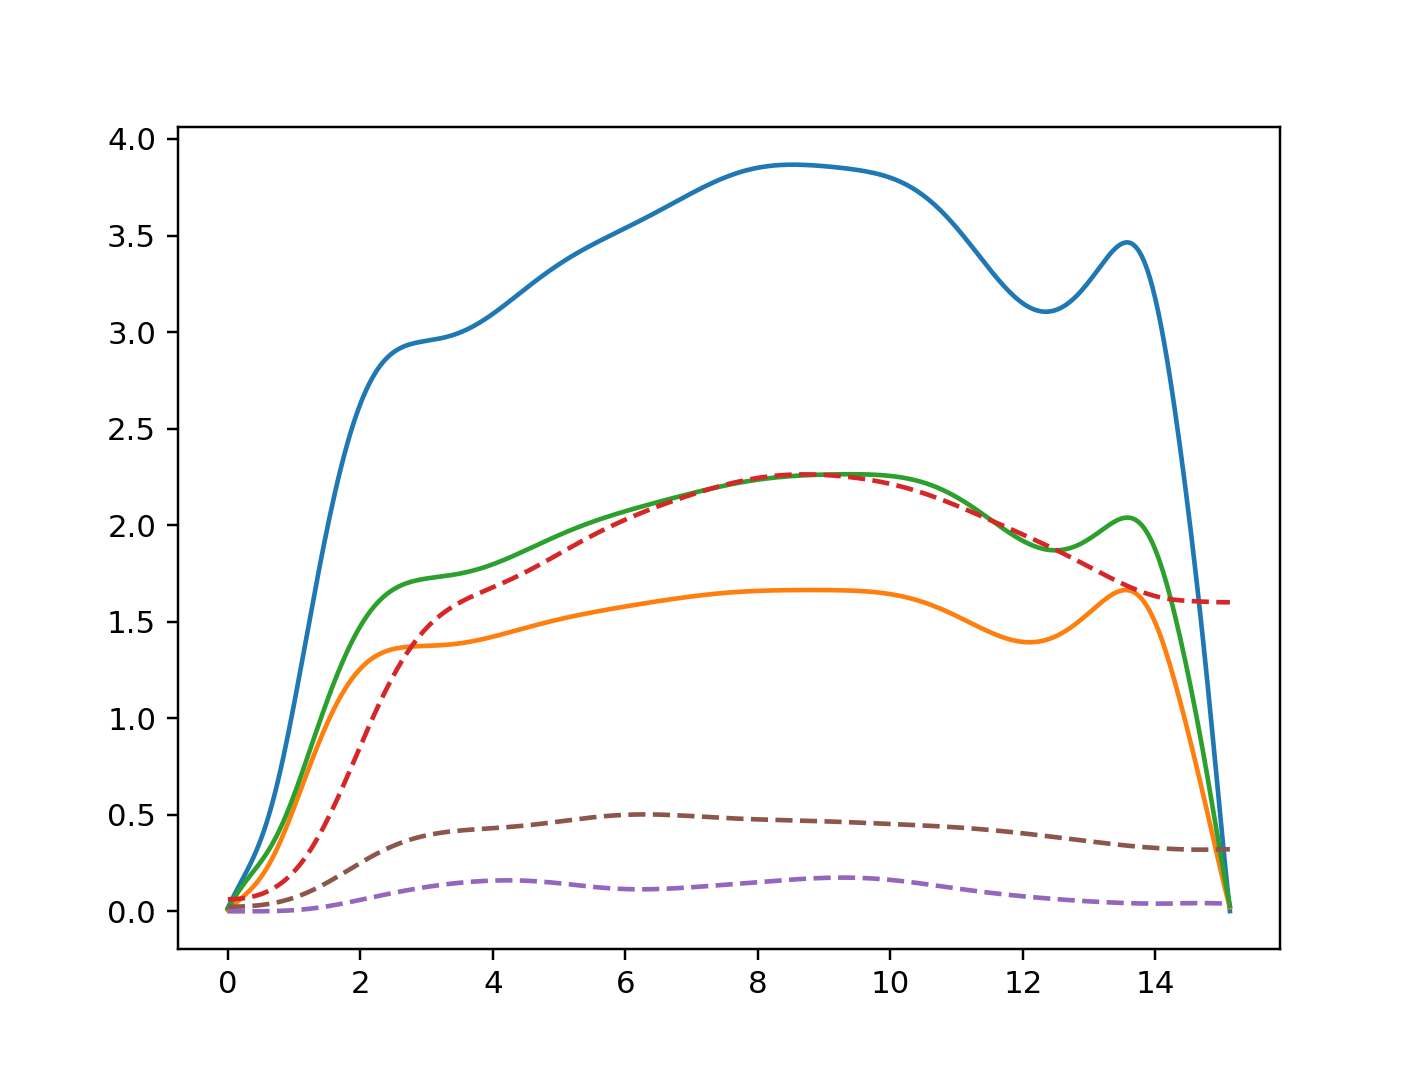

In [28]:
times = np.arange(Nt)/24.

plt.figure()
plt.plot(times,ctdom.T,times,dfdom.T,'--')

In [ ]:
# poster presentation purpose: Ct and div(Fbc)
vmin, vmax = -1e-2, 2e-2
Lx, Ly = 1500e3, 1500e3
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8,5))

##### bottom-conversion term
ax = axs[0]
bm = Basemap(projection=proj,resolution=res,lon_0=lon.mean(),
    lat_0=lat.mean(),width=Lx,height=Ly, ax=ax)
xx, yy = bm(lon, lat)
bm.drawcoastlines(color='gray')
bm.fillcontinents(color='gray')
bm.drawparallels(np.arange(-60,70,stride),labels=[1,0,0,0],linewidth=0.8,\
                fontsize=fs,color=grdcol)
bm.drawmeridians(np.arange(-100,100,stride),labels=[0,0,0,1],linewidth=0.8,\
                fontsize=fs,color=grdcol)
hct = bm.contour(xx,yy,topo,levels=zlevs,colors=topocol,linewidths=0.5,alpha=0.5)
for item in hct.collections:
    item.set_rasterized(True)

hpc = bm.pcolormesh(xx,yy,cterm,vmin=vmin,vmax=vmax,norm=norm,cmap=cmap)
ax.set_aspect(1)

for dom in doms:
    pola = np.r_[[np.array([lon[jj,ii],lat[jj,ii]]) for ii,jj in poly_subsamp(dom,indx,indy)]]
    x, y = bm(*pola.T.take(range(len(dom)+1),axis=1,mode='wrap'))
    bm.plot(x, y, color="tab:green", linewidth=0.8, alpha=0.7)
    
##### bottom-conversion term
ax = axs[1]
bm = Basemap(projection=proj,resolution=res,lon_0=lon.mean(),
    lat_0=lat.mean(),width=Lx,height=Ly, ax=ax)
xx, yy = bm(lon, lat)
bm.drawcoastlines(color='gray')
bm.fillcontinents(color='gray')
bm.drawparallels(np.arange(-60,70,stride),labels=[0,1,0,0],linewidth=0.8,\
                fontsize=fs,color=grdcol)
bm.drawmeridians(np.arange(-100,100,stride),labels=[0,0,0,1],linewidth=0.8,\
                fontsize=fs,color=grdcol)
hct = bm.contour(xx,yy,topo,levels=zlevs,colors=topocol,linewidths=0.5,alpha=0.5)
for item in hct.collections:
    item.set_rasterized(True)
ax.set_aspect(1)

hpc = bm.pcolormesh(xx,yy,divflux,vmin=valmin,vmax=valmax,norm=norm,cmap=cmap)

for dom in doms:
    pola = np.r_[[np.array([lon[jj,ii],lat[jj,ii]]) for ii,jj in poly_subsamp(dom,indx,indy)]]
    x, y = bm(*pola.T.take(range(len(dom)+1),axis=1,mode='wrap'))
    bm.plot(x, y, color="tab:green", linewidth=0.8, alpha=0.7)
    
hcb = fig.colorbar(hpc, ax=axs, orientation="horizontal", fraction=0.05)   

plt.savefig('pictures/LUCKYM2_Cterm_DivBC.png', magnification='auto', dpi=150, bbox_inches="tight")

/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


<IPython.core.display.Javascript object>


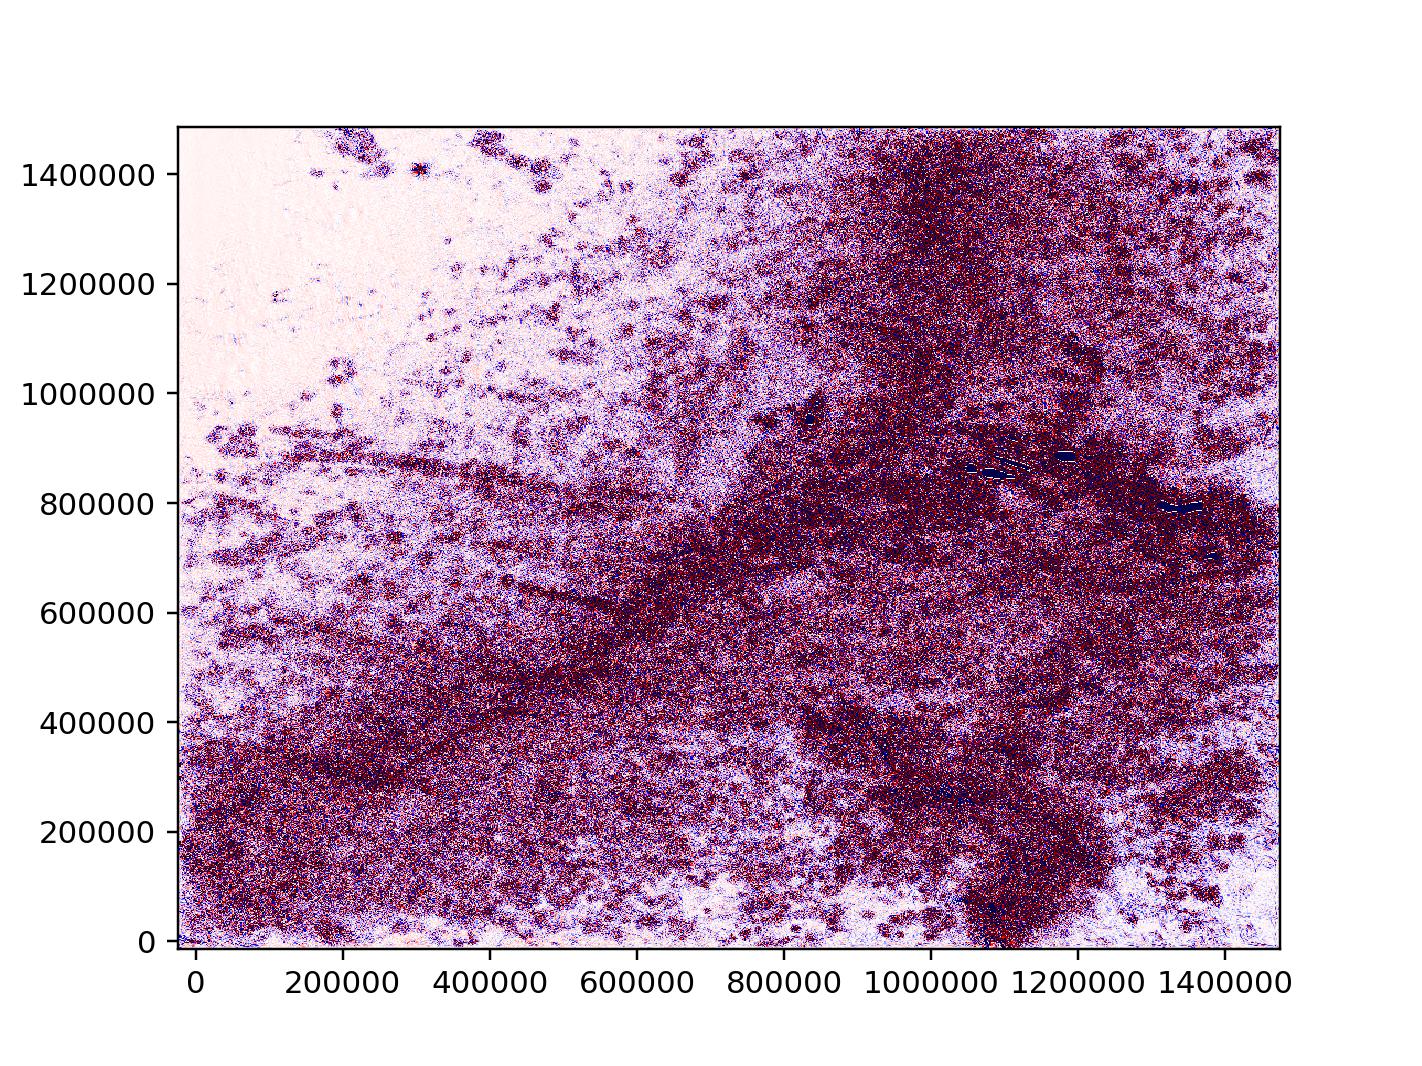

In [21]:
# barotropic flux divergence

nc = MFDataset(fil_sflux, aggdim="eta_rho")
Fx = np.ma.masked_invalid(nc.variables['pubt_lf'][:,:,it])
Fy = np.ma.masked_invalid(nc.variables['pvbt_lf'][:,:,it])
nc.close()

divfbt = (np.gradient(Fx,np.mean(1./pm),axis=1) + np.gradient(Fy,np.mean(1./pn),axis=0)) *1e3

plt.figure()
plt.pcolormesh(xx,yy,divfbt,vmin=valmin,vmax=valmax,norm=norm,cmap=cmap)